# IBM Q Øvelse 1: Måling af én qubit
### Skrevet af Anna Liv Paludan Bjerregaard

I denne øvelse skal du igennem nogen af fundamenterne for hvad IBM Q kan. Du kommer til at 

1) Lave dit første kvante-kredsløb

2) Måle på en qubit

3) Bruge operatorer på denne qubit

IBM Q bruger kodesproget Python. Du skal ikke bekymre dig om hvis du ikke kender til det, det vigtigste du skal vide er at man trykker `shift`+`return` for at køre koden i en given celle - prøv det med cellen nedenfor som importerer de pakker vi skal bruge til øvelsen!

In [67]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-11-07 15:42:27,066: Credentials are already in use. The existing account in the session will be replaced.


Vi starter med at lave et kredsløb med én qubit, samt en måleoperator. Kør koden nedenfor for at sætte kredsløbet op. 

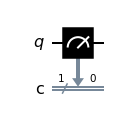

In [68]:
circuit = QuantumCircuit(1,1) #Kredsløb med én qubit og én klassisk bit
circuit.measure(0,0) #Lav en mǻling på den første qubit og gem resultatet i den første klassiske bit
circuit.draw() #Tegn et diagram af kredsløbet

***Hvordan man læser diagrammet:*** Diagrammet ovenfor har to læses fra venstre til højre og har to linjer; "q" linjen indikerer en qubit og "c" linjen indikerer en klassisk bit. Den sorte kasse med et speedometer er måleoperatoren - den laver en måling af qubit'en og gemmer resultatet i den klassiske bit.

Når et kredsløb startes er en qubit altid i tilstanden $|0\rangle$.

**Opgave:** Hvilket resultat forventer du af måleoperatoren i dette kredsløb?

Lad os prøve at eftervise dette med en rigtig måling! Koden nedenfor tager dette kredsløb og viser resultatet af målingerne. Variable `N_measure`bestemmer antallet af målinger som bliver lavet og `sim` bestemmer om målingen bliver gjort på en simulator eller en ægte kvantecomputer! Dvs at hvis du sætter `sim = False` bliver kredsløbet sendt til og målt på af en ægte kvantecomputer et sted i verdenen! Dette kan dog tage lidt lang tid, da der oftest er kø til at bruge disse computere - men du kan jo prøve det af i aften når du er kommet hjem!

In [69]:
sim = True
N_measure = 100

{'|0>': 100, '|1>': 0}


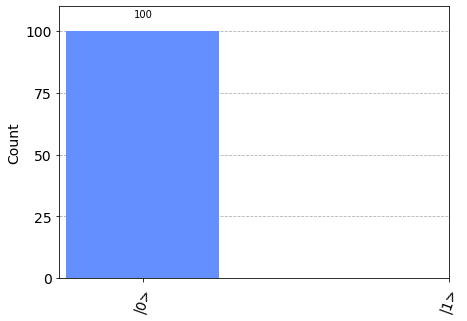

In [72]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuit, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuit, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['0','1']
measurement_names = ['|0>','|1>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

**Opgave:** Histogrammet ovenfor viser hvor mange gange målingen af qubit'en gav $0$ og $1$. Stemmer dette overens med din forventning? Forklar hvorfor.

Nu prøver vi at operere på vores qubit med operatoren $X$ (definition 11 i noterne).

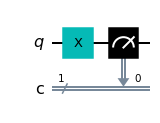

In [46]:
circuitX = QuantumCircuit(1,1) #Kredsløb med én qubit og én klassisk bit
circuitX.x(0) #Brug X operatoren på den første qubit
circuitX.measure(0,0) #Lav en mǻling på den første qubit og gem resultatet i den første klassiske bit
circuitX.draw() #Tegn et diagram af kredsløbet

**Opgave:** Forklar diagrammet ovenfor - husk at det læses fra venstre til højre.

Kredsløbet vi har sat op laver en qubit i tilstanden $X|0\rangle$. Hvilket resultat forventer du af at måle på dette kredsløb?

In [47]:
sim = True
N_measure = 100

{'|0>': 0, '|1>': 100}


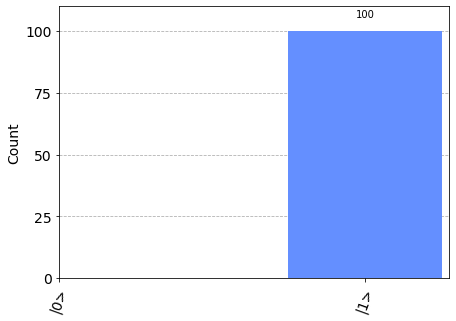

In [56]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitX, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuitX, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['0','1']
measurement_names = ['|0>','|1>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

Vi prøver igen med $H$ operatoren, også defineret i noterne (definition 12) - hvilket resultat forventer du?

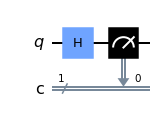

In [73]:
circuitH = QuantumCircuit(1,1) #Kredsløb med én qubit og én klassisk bit
circuitH.h(0) #Brug H operatoren på den første qubit
circuitH.measure(0,0) #Lav en mǻling på den første qubit og gem resultatet i den første klassiske bit
circuitH.draw() #Tegn et diagram af kredsløbet

In [74]:
sim = True
N_measure = 1024

{'|0>': 510, '|1>': 514}


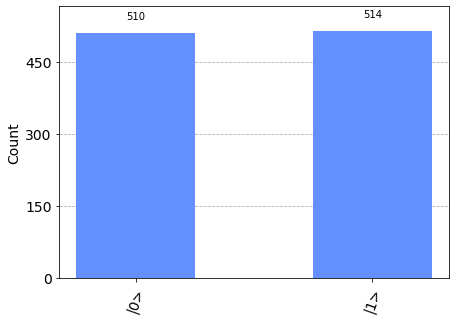

In [75]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitH, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuitH, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['0','1']
measurement_names = ['|0>','|1>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

**Opgave:** Forklar histogrammet ovenfor - stemmer det overens med dine forventninger

Nu har du lært lidt om qubits, operatorer og målinger - du er derfor klar til at gå videre i din læring om kvantecomputere og tackle koncepter som operationer på flere qubits og sammenfiltring!

**Ekstra opgave:** Hvad hvis vi opsatte tilstanden $ZH|0\rangle$? Hvilke målinger ville du forvente?

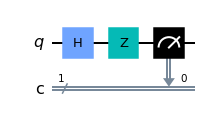

In [64]:
circuitZH = QuantumCircuit(1,1) #Kredsløb med én qubit og én klassisk bit
circuitZH.h(0) #Brug H operatoren på den første qubit
circuitZH.z(0) #Brug Z operatoren på den første qubit
circuitZH.measure(0,0) #Lav en mǻling på den første qubit og gem resultatet i den første klassiske bit
circuitZH.draw() #Tegn et diagram af kredsløbet

In [65]:
sim = True
N_measure = 1024

{'|0>': 505, '|1>': 519}


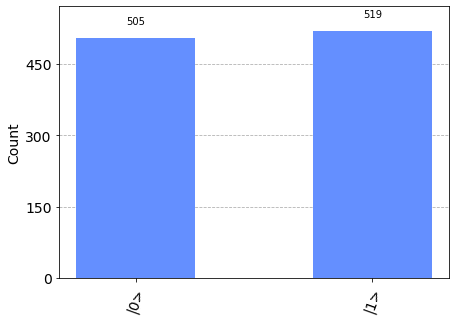

In [66]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuitZH, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuitZH, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['0','1']
measurement_names = ['|0>','|1>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)